In [1]:
from dateutil.parser import parse
import numpy as np
import re
def getHM(time_string):
    return [parse(time_string).hour,parse(time_string).minute]
def checkDateTimes(dateTimes):
    #print(dateTimes[0])
    if re.search('24:00:00',dateTimes[0]):
        dateTimes[0]=re.sub('24:00:00','00:00:00',dateTimes[0])
    return dateTimes[0]
time1=np.array([[' 07/14  02:00:00'],[' 07/14  24:00:00'],[' 07/14  24:00:00']])
t2=list(map(checkDateTimes,time1))
t3=list(map(getHM,t2))

In [2]:
import csv
import pandas as pd
import os
import re
from sklearn import svm
import time
def readData(dataPath):
    input4Temp,output4Temp=[],[]
    #cloth clo, relative humidity, matebolic rate are constant. air speed, radiant temp, air temp are variable. 
    input4PMV,output4PMV=[],[]  
    input4Energy,output4Energy=[],[]
    dataFilesList=os.listdir(dataPath)
    os.chdir(dataPath)
    for path in dataFilesList:
        if re.search("\d+$",path):
            #print(path)
            if os.path.exists(dataPath+path+'\\work.csv'):
                dataDF=pd.read_csv(dataPath+path+'\\work.csv')
                #print(dataDF.columns)
                timeArray=dataDF[['Date/Time']].values
                timeArray=list(map(checkDateTimes,timeArray))
                #printimeArray)
                hourMinuteArray=np.array(list(map(getHM,timeArray)))
                dataDF['Hour']=pd.Series(hourMinuteArray[:,0])
                dataDF['Minute']=pd.Series(hourMinuteArray[:,1])
                #print(dataDF['Hour'])
                #print(pd.isna(dataDF['Hour']))#dataDF.fillna(0)
                x_values=dataDF[['Hour','Minute','Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',\
                    'Environment:Site Outdoor Air Wetbulb Temperature [C](TimeStep)',\
                    'HOTEL-4-20:Zone Total Internal Radiant Heating Energy [J](TimeStep)',\
                    'HOTEL-4-20:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)',\
                    'FANAVAILSCHED:Schedule Value [](TimeStep)']].values
                y_values=dataDF['HOTEL-4-20:Zone Air Temperature [C](TimeStep)'].values

                x_values_PMV=dataDF[['Hour','Minute','Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',\
                    'Environment:Site Outdoor Air Wetbulb Temperature [C](TimeStep)',\
                    'HOTEL-4-20:Zone Total Internal Radiant Heating Energy [J](TimeStep)',\
                    'HOTEL-4-20:Zone Air Temperature [C](TimeStep)',]].values#
                y_values_PMV=dataDF['PEOPLE4-20:Zone Thermal Comfort Fanger Model PMV [](TimeStep)'].values

                x_values_energy=dataDF[['Hour','Minute','Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',\
                    'Environment:Site Outdoor Air Wetbulb Temperature [C](TimeStep)',\
                    'HOTEL-4-20:Zone Total Internal Radiant Heating Energy [J](TimeStep)',\
                    'HOTEL-4-20:Zone Air Temperature [C](TimeStep)',\
                    'HOTEL-4-20:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)',\
                    'FANAVAILSCHED:Schedule Value [](TimeStep)']].values
                y_values_energy=dataDF['Electricity:HVAC [J](TimeStep)'].values 

                input4Temp.extend(x_values[96:204,:])
                output4Temp.extend(y_values[96:204])

                input4PMV.extend(x_values_PMV[96:204,:])
                output4PMV.extend(y_values_PMV[96:204])

                input4Energy.extend(x_values_energy[96:204,:])
                output4Energy.extend(y_values_energy[96:204])
    return np.array(input4Temp),np.array(output4Temp),np.array(input4PMV),np.array(output4PMV),np.array(input4Energy),np.array(output4Energy)

In [3]:
from sklearn import tree
from sklearn.externals import joblib
def trainEnergyWithDecisionTree(trainX, trainY):
    t0=time.time()
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(trainX, trainY)
    print('time4trainEnergyWithDecisionTree',time.time()-t0)
    joblib.dump(clf, "C:\\Users\\tzcha\\BigEnergyWithDecisionTree.m")
    
def trainTempWithDecisionTree(trainX, trainY):
    t0=time.time()
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(trainX, trainY)
    print('time4trainTempWithDecisionTree',time.time()-t0)
    joblib.dump(clf, "C:\\Users\\tzcha\\BigTempWithDecisionTree.m")
    
def trainPMVWithDecisionTree(trainX, trainY):
    t0=time.time()
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(trainX, trainY)
    print('time4trainPMVWithDecisionTree',time.time()-t0)
    joblib.dump(clf, "C:\\Users\\tzcha\\BigPMVWithDecisionTree.m")

In [5]:
dataPath='G:\\optimization\\optimization-big\\'
input4Temp,output4Temp,input4PMV,output4PMV,input4Energy,output4Energy=readData(dataPath)

In [53]:
input4Energy.shape

(105408, 8)

In [56]:
trainX_energy=input4Energy[:100000,:]
trainY_energy=output4Energy[:100000]
testX_energy=input4Energy[100000:105408,:]
testY_energy=output4Energy[100000:105408]

In [15]:
np.save("C:\\Users\\tzcha\\code\\x_value_big",input4Energy[:107,:])

In [14]:
elec_price=[0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,\
            1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,\
            1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,2.92,2.92,2.92,2.92,2.92,2.92,\
            2.92,2.92,2.92,2.92,2.92,2.92,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,\
            1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,1.3782,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595,0.8595]
timeofuse=np.array(elec_price)

In [28]:
trainEnergyWithDecisionTree(trainX_energy,trainY_energy)

time4trainEnergyWithDecisionTree 0.5782499313354492


In [57]:
from sklearn.metrics import mean_squared_error,r2_score
clf_energy = joblib.load("C:\\Users\\tzcha\\BigEnergyWithDecisionTree.m")
predicted_energy=clf_energy.predict(testX_energy)
e2=mean_squared_error(testY_energy, predicted_energy)
r2_energy=r2_score(testY_energy,predicted_energy)
print('e2',e2,'r2',r2_energy)

e2 1314173072425.1377 r2 0.9901446081650783


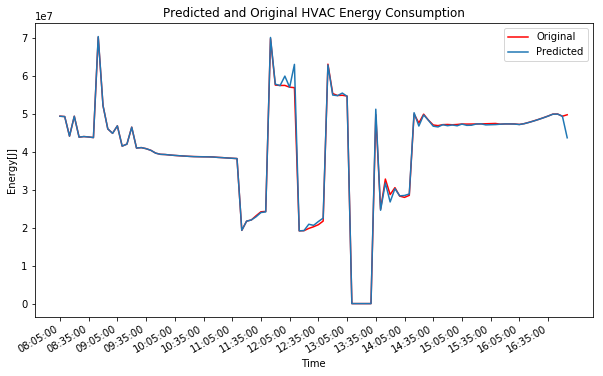

In [37]:
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import matplotlib.dates as mdates
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(1,1,1)
ax1.set_title('Predicted and Original HVAC Energy Consumption')
ax1.set_ylabel('Energy[J]')
ax1.set_xlabel('Time')
ax1.set_xticks(range(0,360,60))

#fig, axs = plt.subplots(2, 1)
formatter =mdates.DateFormatter('%H:%M:%S')
delta = timedelta(minutes=5)
d1 = datetime(2018, 2, 10, 8,5,0)
d2 = datetime(2018,2, 10, 16,55,00)
dates = mdates.drange(d1, d2, delta)
xticks=mdates.drange(d1,d2,timedelta(minutes=30))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
ax1.set_xticks(xticks)
ax1.plot(dates, testY_energy[:107], label= 'Original')
ax1.plot(dates, predicted_energy[:107],label="Predicted")
ax1.legend(loc='best')
plt.gcf().autofmt_xdate()

In [58]:
trainX_temp=input4Temp[:100000,:]
trainY_temp=output4Temp[:100000]
testX_temp=input4Temp[100000:105408,:]
testY_temp=output4Temp[100000:105408]

In [34]:
trainTempWithDecisionTree(trainX_temp,trainY_temp)

time4trainTempWithDecisionTree 0.376096248626709


e1 0.0037091250058351945 r2_temp 0.9979242909513751


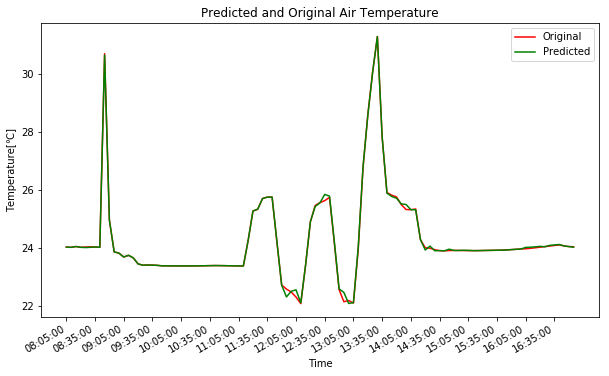

In [59]:
clf_temp=joblib.load('C:\\Users\\tzcha\\BigTempWithDecisionTree.m')
predicted_temp=clf_temp.predict(testX_temp)
e1=mean_squared_error(testY_temp, predicted_temp)
r2_temp=r2_score(testY_temp, predicted_temp)
print('e1',e1,'r2_temp',r2_temp)
fig2=plt.figure(figsize=(10,6))
ax2=fig2.add_subplot(1,1,1)
ax2.set_xlabel('Time')
ax2.set_ylabel('Temperature[℃]')
ax2.set_title('Predicted and Original Air Temperature')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
ax2.set_xticks(xticks)
#fig, axs = plt.subplots(2, 1)
ax2.plot(dates, testY_temp[:107],color='red',label='Original')
ax2.plot(dates, predicted_temp[:107],color='green',label='Predicted')
plt.gcf().autofmt_xdate()
ax2.legend(loc='best')

In [60]:
trainX_PMV=input4PMV[:100000,:]
trainY_PMV=output4PMV[:100000]
testX_PMV=input4PMV[100000:105408,:]
testY_PMV=output4PMV[100000:105408]

In [37]:
trainPMVWithDecisionTree(trainX_PMV,trainY_PMV)

time4trainPMVWithDecisionTree 0.5036840438842773


e3 0.0008865277614213253 r2_PMV 0.9938052191264197


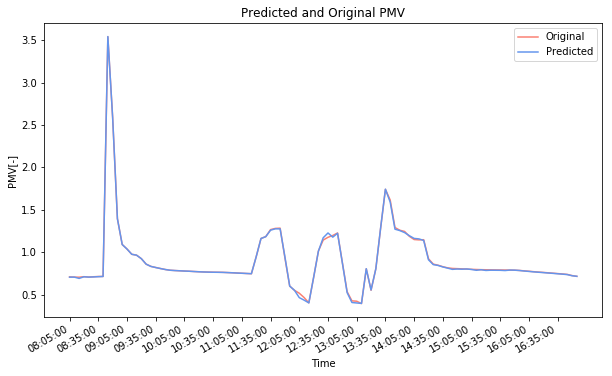

In [61]:
clf_PMV = joblib.load('C:\\Users\\tzcha\\BigPMVWithDecisionTree.m')
predicted_PMV = clf_PMV.predict(testX_PMV)
e3=mean_squared_error(testY_PMV, predicted_PMV)
r2_PMV=r2_score(testY_PMV, predicted_PMV)
print('e3',e3,'r2_PMV',r2_PMV)
fig2=plt.figure(figsize=(10,6))
ax2=fig2.add_subplot(1,1,1)
ax2.set_xlabel('Time')
ax2.set_ylabel('PMV[-]')
ax2.set_title('Predicted and Original PMV')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
ax2.set_xticks(xticks)
ax2.plot(dates, testY_PMV[:107],color='salmon',label='Original')
ax2.plot(dates, predicted_PMV[:107],color='cornflowerblue',label='Predicted')
plt.gcf().autofmt_xdate()
ax2.legend(loc='best')